In [126]:
import pandas as pd
import matplotlib.pyplot as plt

**1. Очищення та підготовка даних**  
  
**1.1. Робота з дублікатами  
1.2. Очищення порожніх даних  
1.3. Зміна типів даних**

**Імпортуємо дані з CSV файлу в Pandas DataFrame, та оцінимо, дані, які є в таблиці.**

In [127]:
df = pd.read_csv('/kaggle/input/store-sales-analysis/Store_Sales.csv', sep=';')
df.head()

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Ship Mode,Shipping Cost,Province,Customer Segment,Product Category,Product Sub-Category,Product Container,Ship Date,Unnamed: 13
0,23429.0,18.03.2016,Critical,28.0,"165,43",Regular Air,6,Ontario,Corporate,Office Supplies,Binders and Binder Accessories,Small Box,18.03.2016,NaN
1,386.0,23.01.2018,High,4.0,"16,0072",Regular Air,"0,5",Ontario,Corporate,Office Supplies,Labels,Small Box,25.01.2018,NaN
2,50754.0,08.12.2016,Not Specified,9.0,"68,51",Regular Air,"5,4",Northwest Territories,Consumer,Technology,Telephones and Communication,Medium Box,09.12.2016,NaN
3,42279.0,29.06.2016,Not Specified,44.0,"1531,17",Express Air,7,Ontario,Home Office,Technology,Computer Peripherals,Small Box,30.06.2016,NaN
4,53635.0,18.07.2019,Not Specified,33.0,"111,1944",Regular Air,"2,1",British Columbia,Small Business,Office Supplies,"Scissors, Rulers and Trimmers",Wrap Bag,20.07.2019,NaN


**Бачимо пустий стовпець "Unnamed: 13", видаляємо його**

In [128]:
df = df.drop('Unnamed: 13', axis=1)
df.head() #Перевірка результату

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Ship Mode,Shipping Cost,Province,Customer Segment,Product Category,Product Sub-Category,Product Container,Ship Date
0,23429.0,18.03.2016,Critical,28.0,"165,43",Regular Air,6,Ontario,Corporate,Office Supplies,Binders and Binder Accessories,Small Box,18.03.2016
1,386.0,23.01.2018,High,4.0,"16,0072",Regular Air,"0,5",Ontario,Corporate,Office Supplies,Labels,Small Box,25.01.2018
2,50754.0,08.12.2016,Not Specified,9.0,"68,51",Regular Air,"5,4",Northwest Territories,Consumer,Technology,Telephones and Communication,Medium Box,09.12.2016
3,42279.0,29.06.2016,Not Specified,44.0,"1531,17",Express Air,7,Ontario,Home Office,Technology,Computer Peripherals,Small Box,30.06.2016
4,53635.0,18.07.2019,Not Specified,33.0,"111,1944",Regular Air,"2,1",British Columbia,Small Business,Office Supplies,"Scissors, Rulers and Trimmers",Wrap Bag,20.07.2019


**Виведемо розмір таблиці**

In [129]:
df.shape

(8417, 13)

Таблиця має 8417 рядків та 13 стовпців

**Проаналізуємо дані на наявність дублікатів. (Їх не має бути, оскільки Order_ID - унікальний)**

In [130]:
df[df.duplicated] #(Дублікатами дало пусті значення)

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Ship Mode,Shipping Cost,Province,Customer Segment,Product Category,Product Sub-Category,Product Container,Ship Date
8400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
df = df.drop_duplicates() #Видалити дублікати
df.shape #Перевірити

(8400, 13)

Було видалено 17 рядків з дублікатами

**Перевіримо на наявність пустих даних**

In [132]:
df.isnull().sum() #Чи є пусті дані за кожним стовпцем

Order ID                1
Order Date              1
Order Priority          1
Order Quantity          1
Sales                   1
Ship Mode               1
Shipping Cost           1
Province                1
Customer Segment        1
Product Category        1
Product Sub-Category    1
Product Container       1
Ship Date               1
dtype: int64

Виведемо рядок/ки з пустими даними

In [133]:
df[df.isnull().any(axis=1)]

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Ship Mode,Shipping Cost,Province,Customer Segment,Product Category,Product Sub-Category,Product Container,Ship Date
8399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Оскільки це 1 повністю пустий рядок, то його можна видалити без втрати даних

In [134]:
df = df.dropna()
df.shape #Перевірка

(8399, 13)

In [135]:
df.isnull().sum() #Перевірка

Order ID                0
Order Date              0
Order Priority          0
Order Quantity          0
Sales                   0
Ship Mode               0
Shipping Cost           0
Province                0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Ship Date               0
dtype: int64

**Розглянемо типи даних, та при необхідності змінимо їх**

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8399 entries, 0 to 8398
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order ID              8399 non-null   float64
 1   Order Date            8399 non-null   object 
 2   Order Priority        8399 non-null   object 
 3   Order Quantity        8399 non-null   float64
 4   Sales                 8399 non-null   object 
 5   Ship Mode             8399 non-null   object 
 6   Shipping Cost         8399 non-null   object 
 7   Province              8399 non-null   object 
 8   Customer Segment      8399 non-null   object 
 9   Product Category      8399 non-null   object 
 10  Product Sub-Category  8399 non-null   object 
 11  Product Container     8399 non-null   object 
 12  Ship Date             8399 non-null   object 
dtypes: float64(2), object(11)
memory usage: 918.6+ KB


Змінимо sales, shipping cost на float, та замінимо "," на "."

In [137]:
df['Sales'] = df['Sales'].astype(str)
df['Shipping Cost'] = df['Shipping Cost'].astype(str)
df['Sales'] = df['Sales'].str.replace(',', '.')
df['Shipping Cost'] = df['Shipping Cost'].str.replace(',', '.')
df['Sales'] = df['Sales'].astype(float)
df['Shipping Cost'] = df['Shipping Cost'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8399 entries, 0 to 8398
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order ID              8399 non-null   float64
 1   Order Date            8399 non-null   object 
 2   Order Priority        8399 non-null   object 
 3   Order Quantity        8399 non-null   float64
 4   Sales                 8399 non-null   float64
 5   Ship Mode             8399 non-null   object 
 6   Shipping Cost         8399 non-null   float64
 7   Province              8399 non-null   object 
 8   Customer Segment      8399 non-null   object 
 9   Product Category      8399 non-null   object 
 10  Product Sub-Category  8399 non-null   object 
 11  Product Container     8399 non-null   object 
 12  Ship Date             8399 non-null   object 
dtypes: float64(4), object(9)
memory usage: 918.6+ KB


Дані підготовлені для аналізу

**2. Аналіз даних**

**Проведемо наступний аналіз:  
2.1. Аналіз динаміки замовлень: Річні та місячні тренди, Середній час доставки  
2.2. Аналіз видів замовлення: вплив Order Priority на термін доставки та Ship Mode на вартість доставки  
2.3. Аналіз категорій продуктів: кількість замовлень та отриманий прибуток за категоріями  
2.4. Сегоментація клієнтів: розділення клієнтів на групи за вартістю замовлення та дослідження впливу на підприємство  
2.5. Георграфічний аналіз клієнтів: Розрахунок загального доходу за Province  
2.6. Аналізування середньої вартості замовлення та середньої кількості товарів за Customer Segment  
ПІДВЕДЕННЯ ЗАГАЛЬНОГО ВИСНОВКУ ПО КОЖНОМУ РОЗДІЛУ**  
  
Прогнозування доходу підприємства буде проведено в MS PowerBi

**2.1. Аналіз динаміки замовлень: Річні та місячні тренди, Середній час доставки**

In [138]:
df1 = df
df1['Order Date'] = pd.to_datetime(df1['Order Date'], format='%d.%m.%Y')
df1['Ship Date'] = pd.to_datetime(df1['Ship Date'], format='%d.%m.%Y')

In [139]:
df1.groupby(df1['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index().round(2)

,Order Date,Sales
0,2016-01,552444.16
1,2016-02,363552.62
2,2016-03,439266.07
3,2016-04,416948.39
4,2016-05,253862.67
5,2016-06,313371.28
6,2016-07,380876.40
7,2016-08,359245.20
8,2016-09,337622.86
9,2016-10,375477.76


Отримано помісячну суму продажів за весь період. Можна побудувати графік для дослідження тенденції

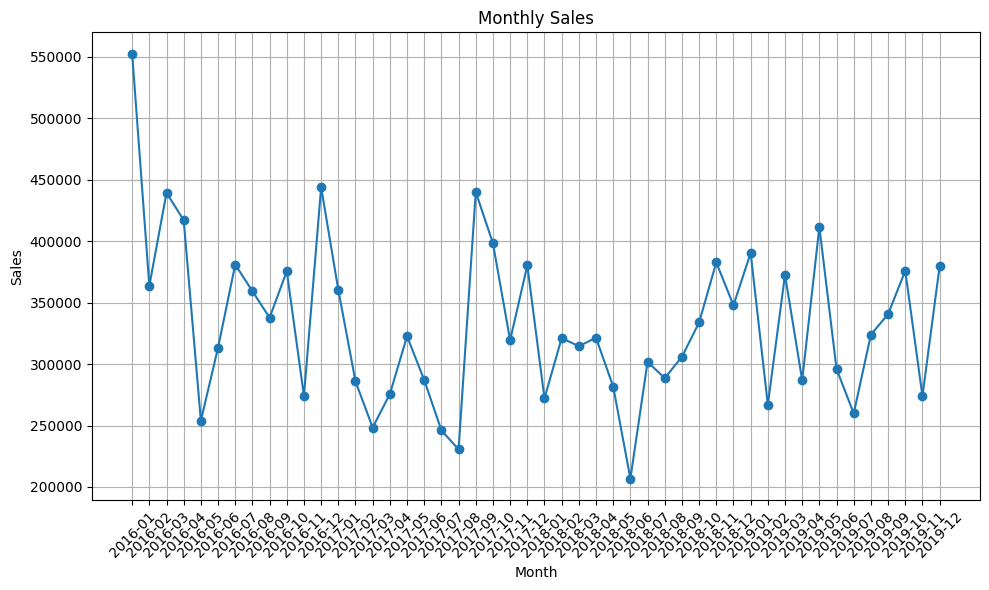

In [140]:
monthly_sales = df1.groupby(df1['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index().round(2)  
 
monthly_sales['Order Date'] = monthly_sales['Order Date'].dt.strftime('%Y-%m') #Перетворення в строковий, щоб не було TypeError

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'], marker='o', linestyle='-')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Поворот місяців
plt.grid(True)  

plt.tight_layout() #Автоматично розмістити всі елементи
plt.show()

Розглянемо середнє значення місячних значення для бачення річної сезонності та побудуємо графік

In [141]:
month_avg = df1.groupby(df1['Order Date'].dt.to_period('M'))['Sales'].mean().reset_index().round(2)
month_avg['Order Date'] = month_avg['Order Date'].dt.strftime('%m')
month_avg.groupby('Order Date')['Sales'].mean().reset_index().round(2)

,Order Date,Sales
0,01,2148.57
1,02,1903.92
2,03,1967.46
3,04,1927.15
4,05,1612.55
5,06,1726.97
6,07,1710.09
7,08,1698.18
8,09,1935.33
9,10,2025.90


Побудуємо лінійний графік, для бачення сезонності

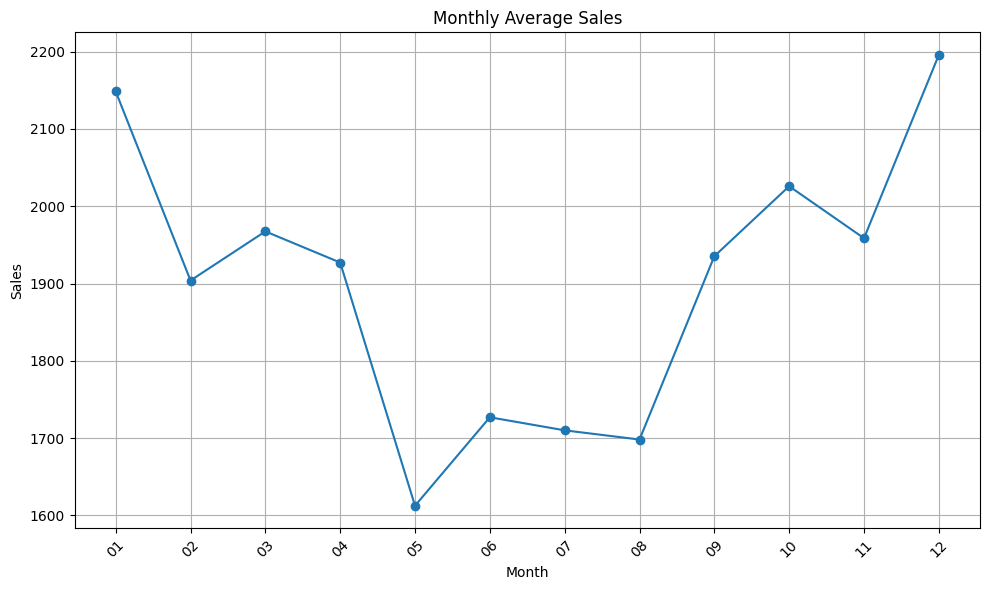

In [142]:
monthly_avg_sales = month_avg.groupby('Order Date')['Sales'].mean().reset_index().round(2)

plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_sales['Order Date'], monthly_avg_sales['Sales'], marker='o', linestyle='-')
plt.title('Monthly Average Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Поворот місяців
plt.grid(True)  

plt.tight_layout() #Автоматично розмістити всі елементи
plt.show()

Розрахуємо середнє значення доставки, як різницю між Order Date та Ship Date

In [143]:
df1['Order Date'] = pd.to_datetime(df1['Order Date'])
df1['Ship Date'] = pd.to_datetime(df1['Ship Date'])

df1['Delivery Time'] = df1['Ship Date'] - df1['Order Date']

df1['Delivery Time'] = df1['Delivery Time'].dt.days

avg_delivery_time = df1['Delivery Time'].mean().round(0).astype(int) #Щоб не було .0

print("Середнє значення доставки:", avg_delivery_time, "дні")

Середнє значення доставки: 2 дні


**2.2. Аналіз видів замовлення: вплив Order Priority на термін доставки та Ship Mode на вартість доставки**

Розглянемо Order Priority та середні показники терміну доставки за ним

In [144]:
df1['Order Priority'].unique()

array(['Critical', 'High', 'Not Specified', 'Low', 'Medium'], dtype=object)

In [145]:
df1.groupby('Order Priority')['Delivery Time'].mean().round(2)

Order Priority
Critical         1.52
High             1.41
Low              4.24
Medium           1.47
Not Specified    1.47
Name: Delivery Time, dtype: float64

Проаналізуємо вплив Ship Mode на Вартість та термін Доставки

In [146]:
df1.groupby('Ship Mode')[['Shipping Cost', 'Delivery Time']].mean().reset_index().round(2)

,Ship Mode,Shipping Cost,Delivery Time
0,Delivery Truck,48.53,2.04
1,Express Air,8.55,2.00
2,Regular Air,8.19,2.04


Побудуємо стовпчикову діграму

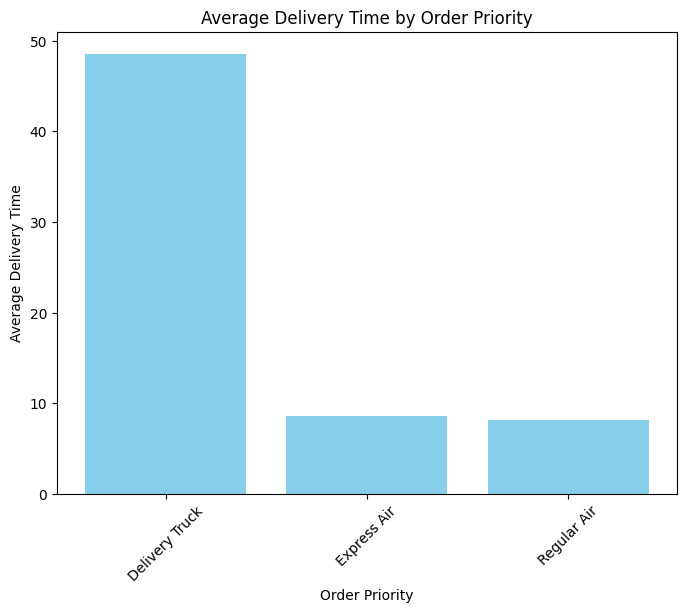

In [147]:
mean_shipping_cost = df1.groupby('Ship Mode')['Shipping Cost'].mean().round(2)

plt.figure(figsize=(8, 6))
plt.bar(mean_shipping_cost.index, mean_shipping_cost.values, color='skyblue')

plt.title('Average Delivery Time by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Average Delivery Time')
plt.xticks(rotation=45)  # Поворот підписів

plt.show()

**2.3. Аналіз категорій продуктів: кількість замовлень та отриманий прибуток за категоріями**

Побудуємо таблицю та стовпчасту діаграму з накопиченням, для відображення прибутку, кількості товарів та середньої вартості продажів.

In [148]:
df_grouped = df1.groupby('Product Category')[['Sales', 'Order Quantity']].sum().reset_index().round(2)
df_grouped['Average Sales'] = (df_grouped['Sales'] / df_grouped['Order Quantity']).round(2)
df_grouped

,Product Category,Sales,Order Quantity,Average Sales
0,Furniture,5541091.88,44324.0,125.01
1,Office Supplies,4015455.48,118278.0,33.95
2,Technology,6403145.54,52175.0,122.72


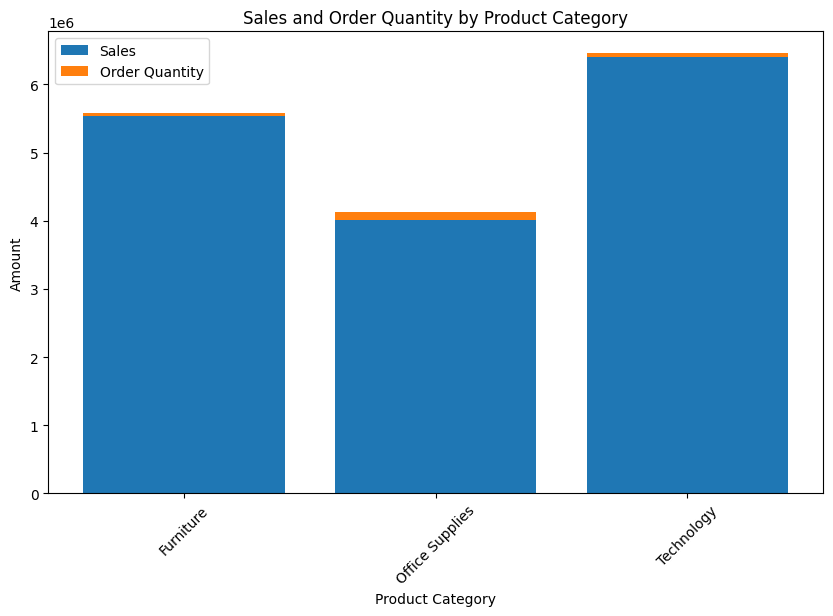

In [149]:
categories = df_grouped['Product Category']

sales = df_grouped['Sales']

order_quantity = df_grouped['Order Quantity']

plt.figure(figsize=(10, 6))
plt.bar(categories, sales, label='Sales')
plt.bar(categories, order_quantity, bottom=sales, label='Order Quantity')

plt.title('Sales and Order Quantity by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()

plt.show()

**2.4. Сегоментація клієнтів: розділення клієнтів на групи за вартістю замовлення та дослідження впливу на підприємство**

Розподілимо клієнтів на 6 груп, за їх витратами для створення та аналізу сегментів споживачів та побудуємо діаграму за даними сегментами згодом

In [150]:
bin_edges = [0, 500, 1000, 2000, 3000, 4000, 10000]  # Створення сегментів

bins = pd.cut(df1['Sales'], bins=bin_edges) # Розбиття даних
bin_stats = df1.groupby(bins, observed=False)['Sales'].agg(['count', 'sum']).reset_index().round(2)

bin_stats = bin_stats.rename(columns={'Sales': 'Total Sales', 'count': 'Number of Customers', 'sum': 'Total Spent'})

bin_stats

,Total Sales,Number of Customers,Total Spent
0,"(0, 500]",4268,788045.36
1,"(500, 1000]",1095,790790.35
2,"(1000, 2000]",1077,1560015.19
3,"(2000, 3000]",540,1328765.19
4,"(3000, 4000]",299,1052282.87
5,"(4000, 10000]",794,4925317.77


Виділяємо три основні групи: роздрібні споживачі, "середні чеки" та "великі" клієнти

In [151]:
bin_edges_short = [0, 1000, 4000, 10000]  # Створення сегментів

bins_s = pd.cut(df1['Sales'], bins=bin_edges_short) # Розбиття даних
bin_stats_s = df1.groupby(bins_s, observed=False)['Sales'].agg(['count', 'sum']).reset_index().round(2)

bin_stats_s = bin_stats_s.rename(columns={'Sales': 'Total Sales', 'count': 'Number of Customers', 'sum': 'Total Spent'})

bin_stats_s

,Total Sales,Number of Customers,Total Spent
0,"(0, 1000]",5363,1578835.70
1,"(1000, 4000]",1916,3941063.26
2,"(4000, 10000]",794,4925317.77


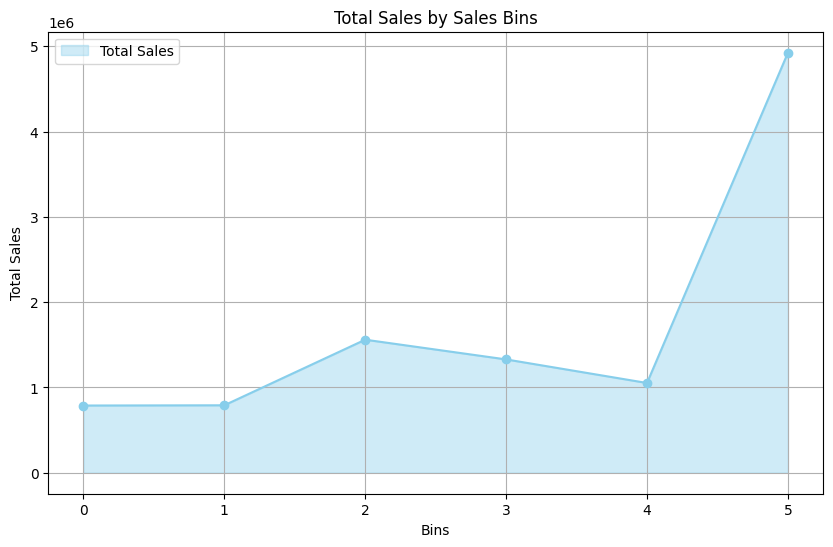

In [152]:
plt.figure(figsize=(10, 6))
plt.fill_between(bin_stats.index, bin_stats['Total Spent'], color='skyblue', alpha=0.4, label='Total Sales')
plt.plot(bin_stats.index, bin_stats['Total Spent'], color='skyblue', marker='o')
plt.xlabel('Bins')
plt.ylabel('Total Sales')
plt.title('Total Sales by Sales Bins')
plt.legend()
plt.grid(True)

plt.show()

**2.5. Георграфічний аналіз клієнтів: Розрахунок загального доходу за Province**

Розрахуємо середній чек, загальний дохід та кількість покупок за провінціями для аналізу

In [153]:
provinces = df1.groupby('Province')['Sales'].agg(['count', 'sum', 'mean']).reset_index().round(2).sort_values('sum', ascending=False)
provinces

,Province,count,sum,mean
8,Ontario,1826,3277637.40,1794.98
1,British Columbia,1126,2025250.89,1798.62
0,Alberta,865,1824126.85,2108.82
10,Quebec,781,1615908.66,2069.03
11,Saskachewan,913,1566967.80,1716.28
2,Manitoba,793,1468948.23,1852.39
12,Yukon,542,1044178.06,1926.53
6,Nova Scotia,464,874970.39,1885.71
5,Northwest Territories,394,856906.67,2174.89
3,New Brunswick,323,732106.29,2266.58


In [154]:
provinces.sort_values('mean', ascending=False)

,Province,count,sum,mean
3,New Brunswick,323,732106.29,2266.58
5,Northwest Territories,394,856906.67,2174.89
0,Alberta,865,1824126.85,2108.82
9,Prince Edward Island,211,438040.07,2076.02
10,Quebec,781,1615908.66,2069.03
12,Yukon,542,1044178.06,1926.53
6,Nova Scotia,464,874970.39,1885.71
2,Manitoba,793,1468948.23,1852.39
1,British Columbia,1126,2025250.89,1798.62
8,Ontario,1826,3277637.40,1794.98


**2.6. Аналізування середньої вартості замовлення та середньої кількості товарів Customer Segment**

З даного нам розподілу на Corporate, Home Office, Consumer та Small Business (Сегменти споживачів) знайдемо основні статистики для проведення аналізу та надання висновку

In [155]:
df1.groupby('Customer Segment')['Sales'].agg(['count', 'sum', 'mean']).reset_index().round(2).sort_values('sum', ascending=False)

,Customer Segment,count,sum,mean
1,Corporate,3076,5883828.13,1912.82
2,Home Office,2032,3814297.39,1877.11
0,Consumer,1649,3278063.86,1987.91
3,Small Business,1642,2983503.52,1816.99


**ПІДВЕДЕННЯ ЗАГАЛЬНОГО ВИСНОВКУ ПО КОЖНОМУ РОЗДІЛУ**  
  
2.1. Аналіз динаміки замовлень: Річні та місячні тренди, Середній час доставки   
З таблиці та графіку бачимо, що дані є мінливими та дуже різко змінюються. Однак, всерівно, прослідковується загальна тенденція до спаду. Середн чітких сезонних трендів на перший погляд бачимо невеликий спад у травні-серпні. Після побудови графіку Monthly Average Sales, де показано середні чеки за місяцями, бачимо, що є тренд до зниження чеку з травня по вересень. Пікових значень середній чек набуває в грудні-січні. Середній термін доставки становить 2 дні, що є досить хорошим показником, це може бути конкурентною перевагою серед інших конкурентів.   

2.2. Аналіз видів замовлення: вплив Order Priority на термін доставки та Ship Mode на вартість доставки
Було розглянуто вплив пріоритетності замовлень на термін доставки. Бачимо, що для важливості Medium, High та Critical середній термін доставки становить 1.5 дні, для замовлень з низькою пріоритетністю це значення становить більше 4х днів. Отже, для важливих клієнті доставка може відбуватися день-у-день, на чому можна акцентуватися в маркетинговій кампанії. Щодо аналізу Ship Mode, то бачимо, що для товарів, які можуть бути відправлені літаком вартість становить близько 8 доларів. Для великогабаритних товарів, які відправляються вантажівкою вартість транспортування становить більше 48 дол.   

2.3. Аналіз категорій продуктів: кількість замовлень та отриманий прибуток за категоріями
Бачимо, що Furniture, Technology мають досить велткі продажі при високому середньому чеці (близько 125 дол.), а Office Supplies має велику кількість проданих товарів та чек 34 дол. Далі згідно з осноними цілями компанія може робити зміни в продуктовій, чи маркетинговій стратегії для збільшення вигоди від  діяльності.   

2.4. Сегоментація клієнтів: розділення клієнтів на групи за вартістю замовлення та дослідження впливу на підприємство
Клієнтів було розподілено на 6 основних груп, для обрахунку їх кількості та загального доходу для компанії. Сегментами стали: роздрібні покупці: (0-500 та 500-1000 дол./чек), клієнти з чеком вищого середнього (1000-2000, 2000-3000, 3000-4000 дол./чек) та "великі" клієнти (більше 4000 дол./чек). Було відктнуто екстримальні значення, для чеків вище 10000$, для збереження раціональності аналізу. Бачимо, що найбільша кількість клієнтів (Більше 5300) - роздрібні клієнти, більше 1900 - середні чеки та близько 800 чеків - великі. Роздрібні клієнти приносять магазину майже 1,6 млн. дол., середні чеки до 4 млн. дол., а великі - майже 5 млн. дол., при найменшій кількості клієнтів. Тому підприємство може змінювати торгову та маркетингову стратегію, згідно його цілей, опираючись на ці дані.   

2.5. Георграфічний аналіз клієнтів: Розрахунок загального доходу за Province  
Бачимо, що за загальною виручкою найкращими регіонами є Ontario, British Columbia та Alberta, однак, за середнім чеком топ регіонів змінюєтсья, та лідерами є New Brunswick, Northwest Territories, Alberta. Тому підприємство може більше акцентуватися на даних регіонах для підвищення рентабельності   

2.6. Аналізування середньої вартості замовлення та середньої кількості товарів за Customer Segment
Сегмент Corporate є найбільш популярним, має найбільшу кількість замовлень та приносить найбільший дохід. В свою чергу, сегмент Consumer має найбільший середній чек. Найгіршими показниками відзначився сегмент Small Business, який має найнижчий середній чек. 


**Збережемо файл df для подальшої роботи з ним в Power BI**

In [156]:
df.to_csv('/kaggle/working/store_result.csv', index=False)